## Importing the Libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import numpy as np

## Loading the Datasets

In [2]:
def load_dataset(name='SVHN', n_samples=2000):
    if name == 'SVHN':
        dataset = torchvision.datasets.SVHN(root='./data', split='train', download=True,
                                            transform=transforms.ToTensor())
        X = dataset.data[:n_samples]  # shape: (N, 32, 32, 3)
        y = dataset.labels[:n_samples]
    elif name == 'CIFAR10':
        dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                                               transform=transforms.ToTensor())
        X = np.stack([np.transpose(img.numpy(), (1, 2, 0)) for img, _ in dataset])[:n_samples]
        y = np.array(dataset.targets)[:n_samples]
    else:
        raise ValueError("Dataset must be either 'SVHN' or 'CIFAR10'")

    X = X.reshape((X.shape[0], -1))  # flatten images
    X = X / 255.0  # normalize to [0, 1]

    return X, y

## Plotting

In [3]:
def reduce_and_plot(X, y, method='PCA', title=''):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 'LDA':
        reducer = LDA(n_components=2)
    elif method == 't-SNE':
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)
    else:
        raise ValueError("Reduction method must be 'PCA', 'LDA', or 't-SNE'")

    X_reduced = reducer.fit_transform(X_scaled, y) if method == 'LDA' else reducer.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='tab10', s=10)
    plt.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"{title} ({method})")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.tight_layout()
    plt.show()

## Execution

Processing SVHN...


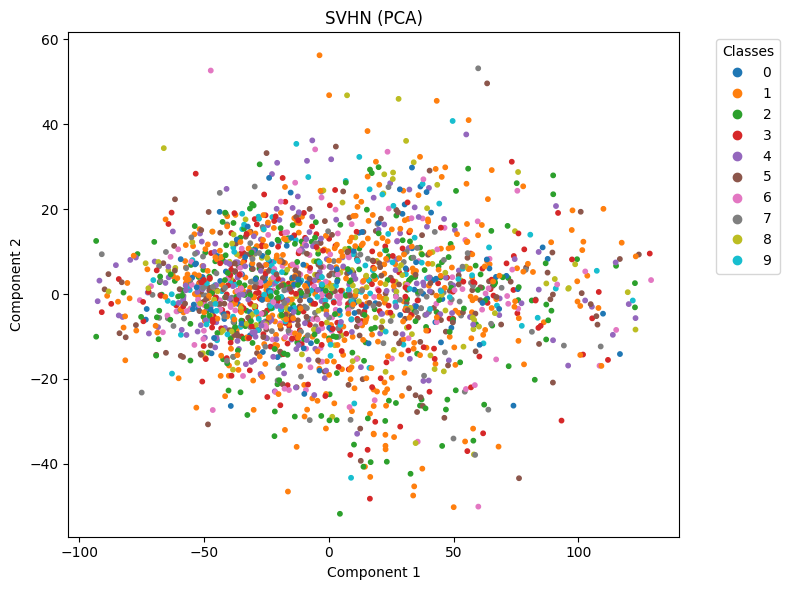

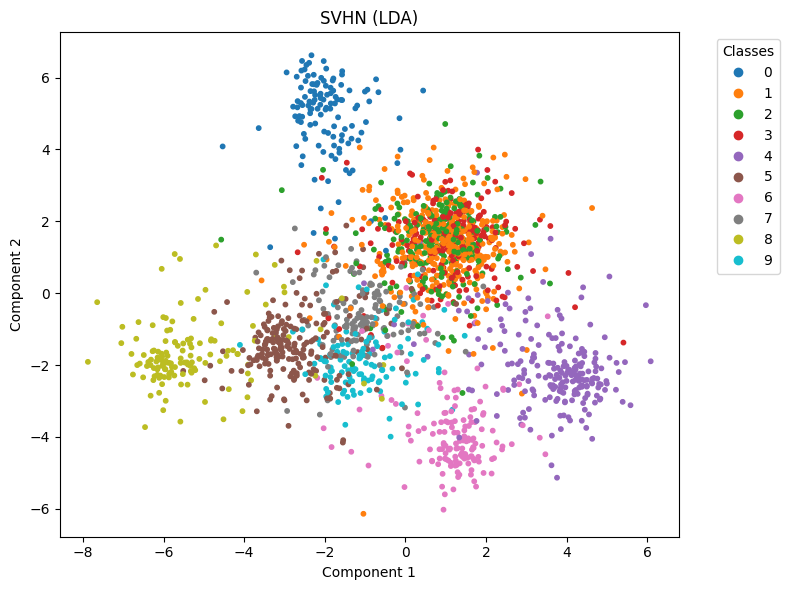

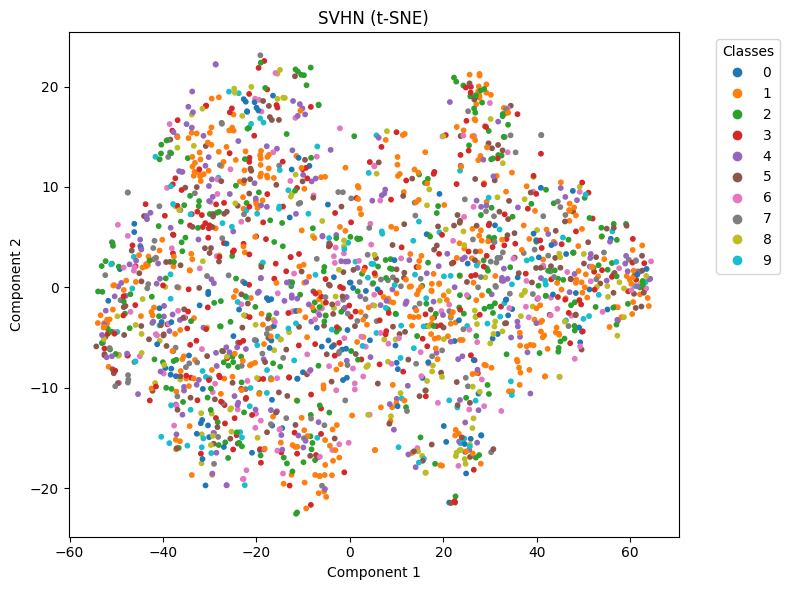

Processing CIFAR10...


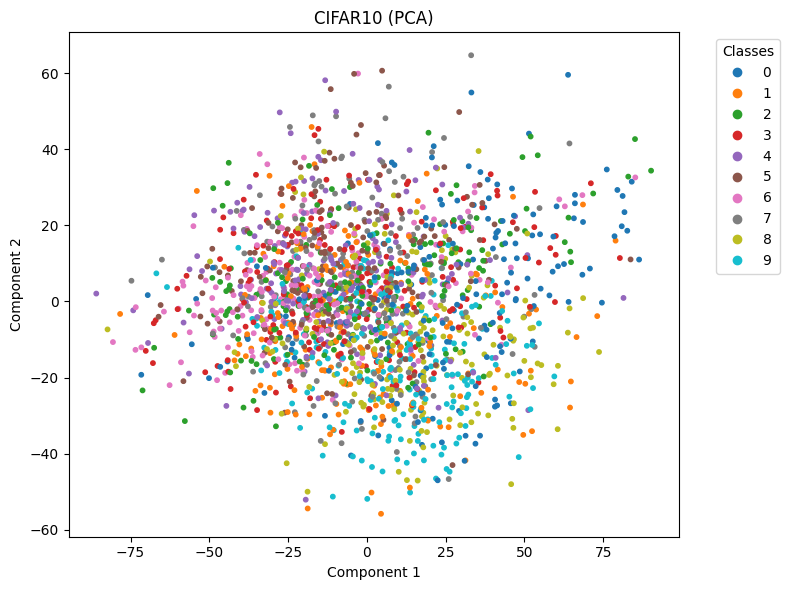

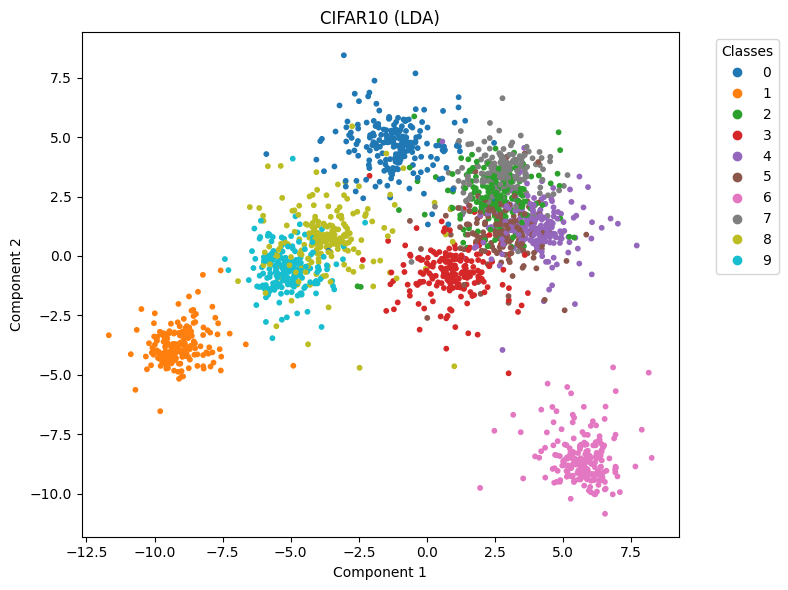

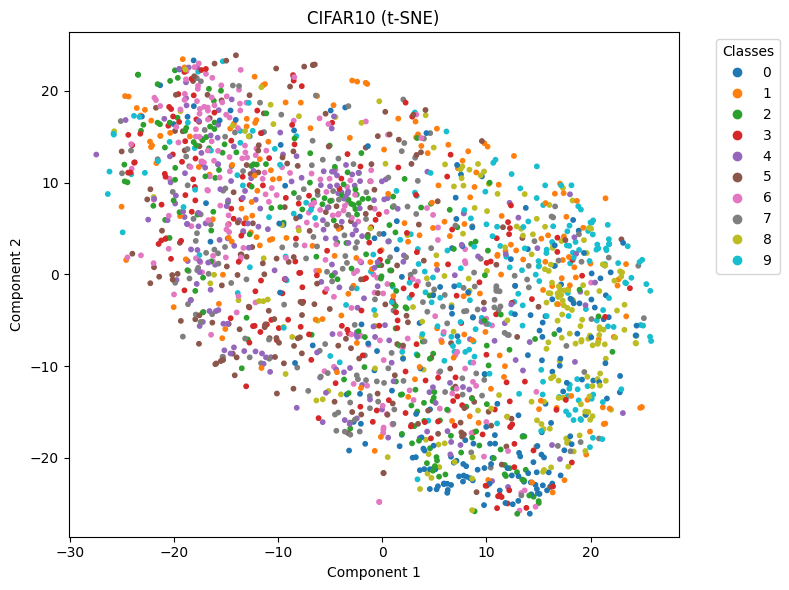

In [4]:
for dataset_name in ['SVHN', 'CIFAR10']:
    print(f"Processing {dataset_name}...")
    X, y = load_dataset(dataset_name, n_samples=2000)
    for method in ['PCA', 'LDA', 't-SNE']:
        reduce_and_plot(X, y, method=method, title=dataset_name)